In [1]:
import oritelib as orite
import numpy  as np
import matplotlib.pyplot as plt


In [2]:
seq = orite.seq_from_fasta("test_data/clostridium_aceto.fna")
nc_intervals = orite.genbank_to_non_coding_intervals("test_data/clostridium_aceto.gbff")
gc, cgc = orite.gc_skew_sliding_window(seq, 250000)


In [3]:
interval_list = nc_intervals[0]

In [4]:
'''
Input: a list of non-coding intervals
Output: a list of the objects form NC_region class, containing sequence and cgc values
'''

def nc_intervals_to_nc_objects(nc_intervals, seq, cgc):
    nc_objcts = []
    for i in range(len(nc_intervals)):
        nc_obj = orite.NC_region(nc_intervals[i][0], nc_intervals[i][1])
        orite.add_sequence_to_region(seq, nc_obj)
        orite.calc_score_for_NC_region(cgc, nc_obj)
        nc_objcts.append(nc_obj)
    return nc_objcts

In [5]:
nc_regions = nc_intervals_to_nc_objects(interval_list, seq, cgc)

In [6]:
len(nc_regions)

3078

In [7]:
filtered_nc_objcts = orite.filter_regions_by_length(nc_regions, 50)

In [8]:
len(filtered_nc_objcts)

2089

In [9]:
def get_kmers_from_region_list(region_list, k_array):
    new_list = []
    for region in region_list:
        for k in k_array:
            region.add_kmer_counts(k)
        new_list.append(region)
    return new_list

In [10]:
k_array = [7,8,9,10]
kmers_from_region_list = get_kmers_from_region_list(filtered_nc_objcts, k_array)

In [11]:
def filter_region_list_by_kmer_occurence(region_list, n):
    new_list = []
    for region in region_list:
        region.filter_kmer_by_occurence(n)
        new_list.append(region)
    return new_list

In [12]:
region_list_by_occurence = filter_region_list_by_kmer_occurence(kmers_from_region_list, 3)

In [13]:
def has_empty_kmer_info(nc_region):

    for key, value in nc_region.kmer_info.items():
        if len(nc_region.kmer_info[key]) != 0:
            return False
    
    return True

In [14]:
def filter_empty_kmer_regions(region_list):
    new_list = []
    
    for region in region_list:
        if not has_empty_kmer_info(region):
            new_list.append(region)
    return new_list

In [15]:
filter_kmer_nc_objcts = filter_empty_kmer_regions(region_list_by_occurence)

In [16]:
def plot_region_list(region_list, curve):
    
    region_intervals = []
    
    for region in region_list:
        this_interval = (region.start, region.stop)
        region_intervals.append(this_interval)
    
    regions_pos_set = orite.interval_list_to_position_set(region_intervals)
    region_pos_list = list(regions_pos_set)
    region_pos_list.sort()
    
    relevant_pos_list = np.array(region_pos_list)
    
    relevant_curve_point = curve[relevant_pos_list]
    
    
    plt.figure(figsize=[40,10])
    plt.plot(curve)
    plt.plot(relevant_pos_list, relevant_curve_point, 'x')
    plt.title(str(len(region_list)))
    
    
    

    


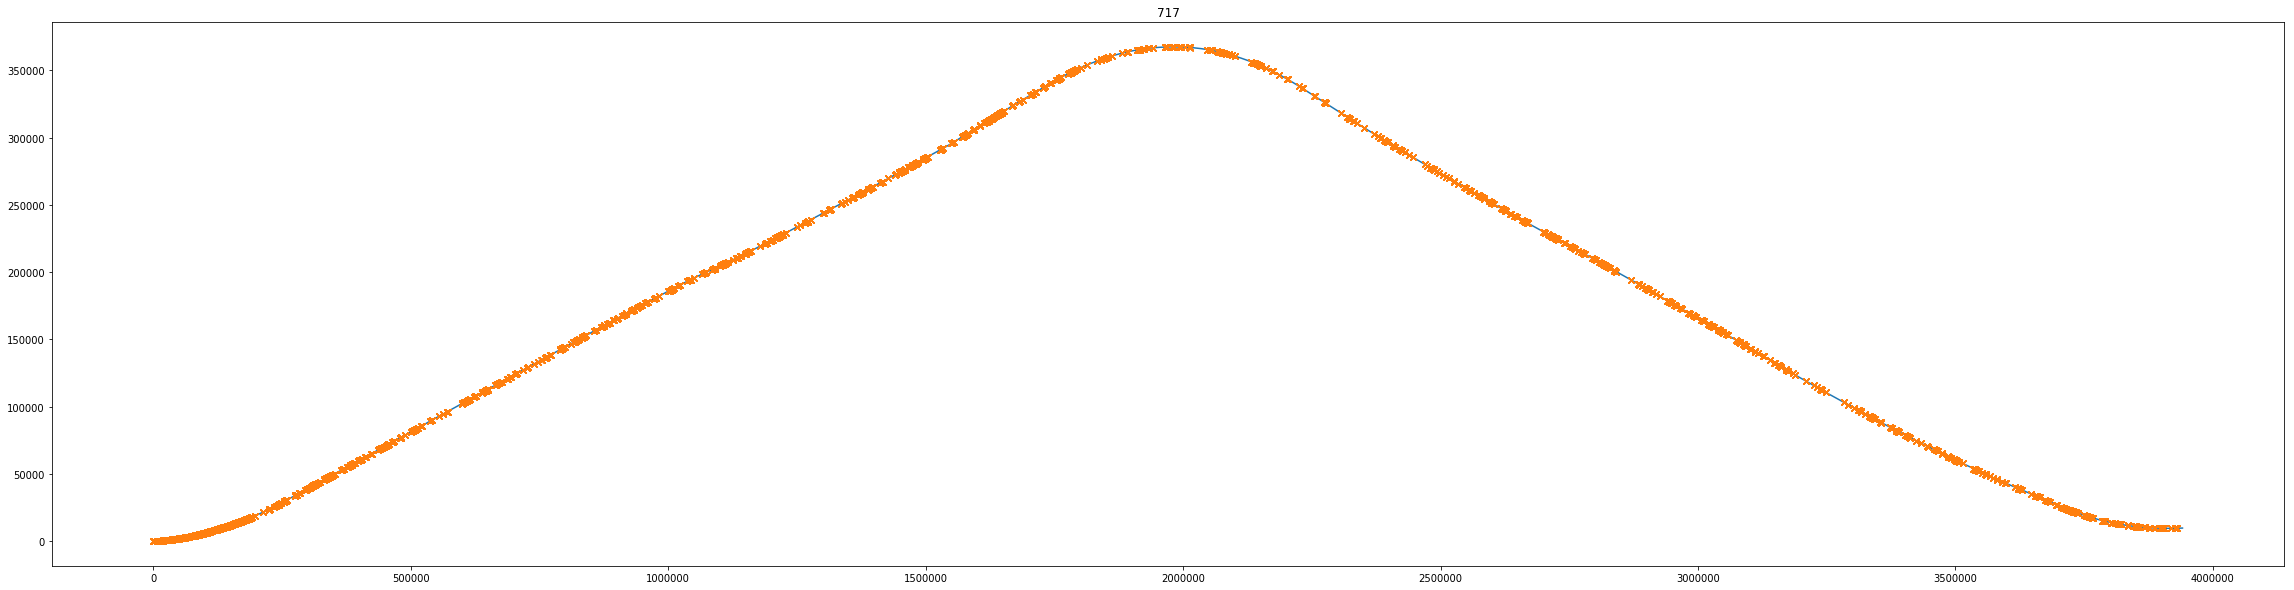

In [17]:
plot_region_list(filter_kmer_nc_objcts, cgc)


In [18]:
orite.sort_regions_by_score(filter_kmer_nc_objcts)

In [19]:
top_10_gcscore_list = filter_kmer_nc_objcts[0:50]

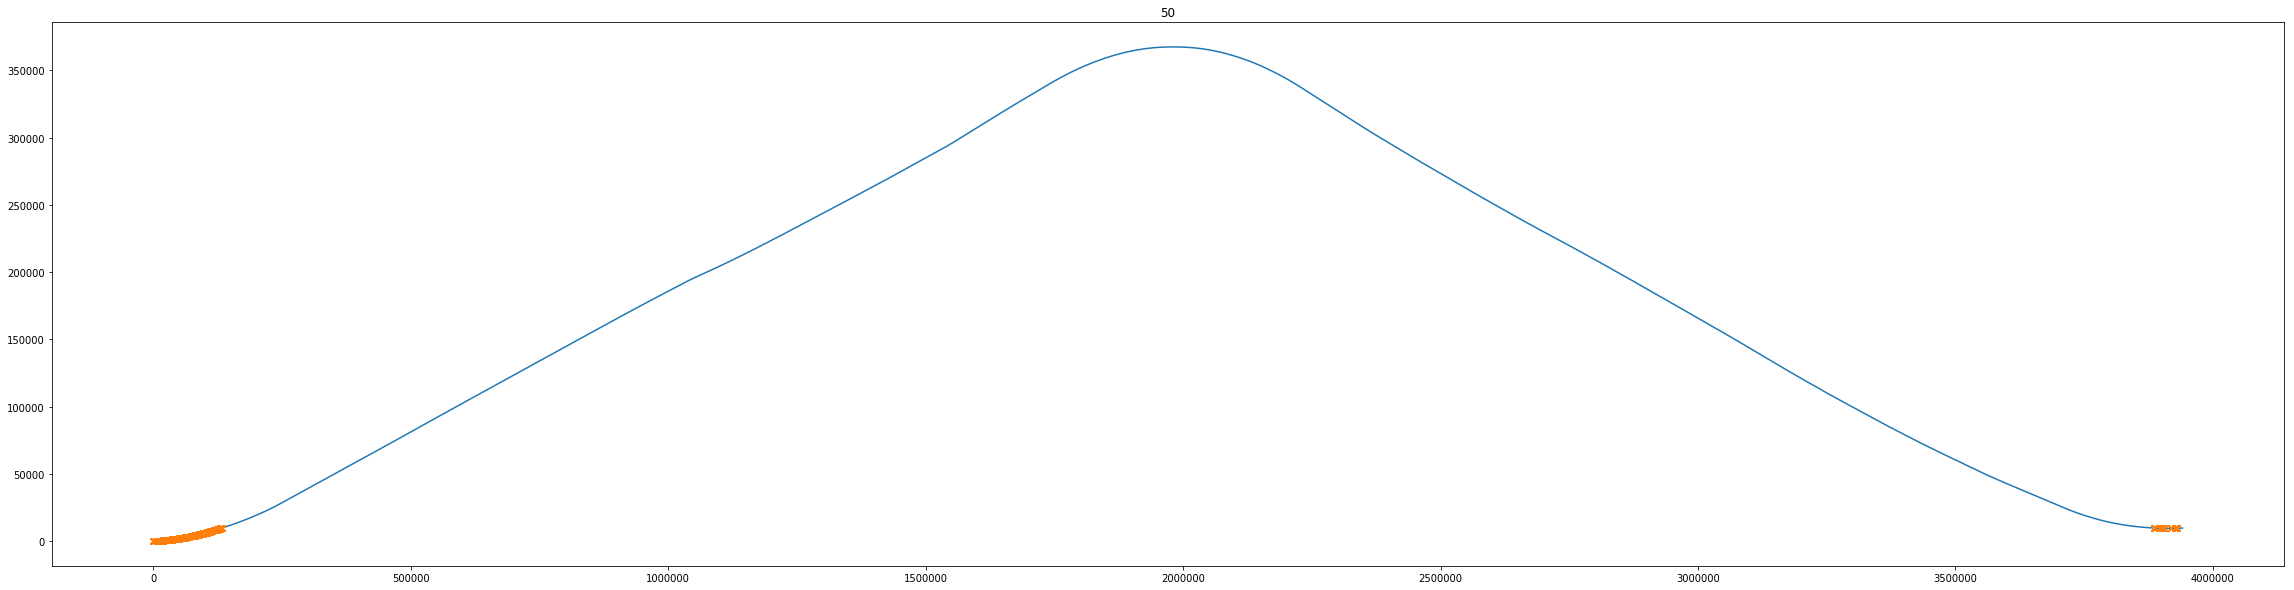

In [20]:
plot_region_list(top_10_gcscore_list, cgc)

In [21]:
def print_region_list_kmer_info(region_list):
    i = 0
    for region in region_list:
        print('region:', i, '---',' score: ', region.cgc_val, '---- pos: ', region.start, '---- max_relative_start_pos', region.max_relative_start)

        for key, value in region.kmer_info.items():
            print('\tk=', key,)
            for thing in value:
                print('\t', thing[0], ' - ', thing[1])

        print('\t-------')

        i = i+1


In [22]:
def add_max_relative_position(region_list, genome_length, max_offset):
    new_list = []
    for region in region_list:
        add_max_relative_position(region, max_offset, genome_length)
        new_list.append(region)
    
    return new_list

In [23]:
print_region_list_kmer_info(top_10_gcscore_list)

region: 0 ---  score:  -4.021409535813797 ---- pos:  0 ---- max_relative_start_pos -1
	k= 7
	 TTTTTTT  -  [5, 229, 230, 231, 232, 442]
	 ATTTTTT  -  [3, 228, 350, 441]
	 TATTTTT  -  [3, 227, 349, 388]
	 TTATTTT  -  [3, 226, 250, 387]
	 TTTTTTA  -  [3, 165, 351, 443]
	 TTTTTGT  -  [3, 98, 234, 390]
	 TGTTGAT  -  [3, 69, 204, 417]
	 TTTTATT  -  [3, 37, 224, 241]
	k= 8
	 TTTTTTTT  -  [3, 229, 230, 231]
	k= 9
	k= 10
	-------
region: 1 ---  score:  -34.67623919499956 ---- pos:  1808 ---- max_relative_start_pos -1
	k= 7
	 GTTAATA  -  [3, 61, 90, 234]
	 TGTTAAT  -  [3, 60, 89, 233]
	k= 8
	 TGTTAATA  -  [3, 60, 89, 233]
	k= 9
	k= 10
	-------
region: 2 ---  score:  -134.87553547207895 ---- pos:  6681 ---- max_relative_start_pos -1
	k= 7
	 AGAAAAT  -  [3, 25, 39, 287]
	k= 8
	k= 9
	k= 10
	-------
region: 3 ---  score:  -258.50956733070393 ---- pos:  7932 ---- max_relative_start_pos -1
	k= 7
	 ATATAAA  -  [10, 384, 1021, 1355, 1440, 1485, 6370, 6781, 7319, 7345, 7377]
	 ATAAAAA  -  [9, 386, 729, 1

	 AGAGGAG  -  [3, 4685, 6111, 6787]
	 ACAAGTG  -  [3, 4676, 5830, 7453]
	 CAAGAGA  -  [3, 4608, 6956, 7431]
	 TAGCTCA  -  [3, 4596, 6571, 6649]
	 TAAAAGA  -  [3, 4581, 7166, 7464]
	 CTAAGGT  -  [3, 4496, 4799, 5396]
	 ATGATAA  -  [3, 4452, 6860, 7265]
	 GGGCTGA  -  [3, 4379, 4702, 5996]
	 TAGAGCA  -  [3, 4359, 6584, 7483]
	 GAGGTAG  -  [3, 4355, 4372, 5030]
	 GGGAGAA  -  [3, 4276, 5195, 6811]
	 AAATTCC  -  [3, 4215, 4281, 5407]
	 TAAAATT  -  [3, 4213, 7308, 7726]
	 GTAAAAT  -  [3, 4212, 7022, 7307]
	 AAGTAAA  -  [3, 4210, 6775, 7107]
	 CTATCCA  -  [3, 4186, 5080, 6923]
	 GAATAGG  -  [3, 4141, 5229, 5586]
	 GAAGGGA  -  [3, 4124, 5806, 6204]
	 TTGTAGA  -  [3, 4063, 7632, 7824]
	 ATCAAAA  -  [3, 4030, 5251, 6980]
	 GAAACCG  -  [3, 4009, 4173, 5780]
	 CAGGAGG  -  [3, 3985, 4931, 7767]
	 AGGGAAA  -  [3, 3964, 4126, 4473]
	 AGCTGGG  -  [3, 3900, 6049, 6655]
	 TGTGGGA  -  [3, 3893, 4531, 6535]
	 GTAAAAA  -  [3, 3837, 7201, 7709]
	 GATTTCT  -  [3, 3795, 4536, 7354]
	 AGCTTTA  -  [3, 3775, 4323

	 CTGAATT  -  [3, 198, 2744, 3620]
	 AGCTGAA  -  [3, 196, 310, 5281]
	 AACTATA  -  [3, 190, 5383, 7285]
	 AATGAAA  -  [3, 184, 623, 6895]
	 AAGATAG  -  [3, 158, 4986, 6723]
	 GAAAAGA  -  [3, 155, 3974, 6877]
	 AGAAAAG  -  [3, 154, 1466, 5070]
	 GAGAAAA  -  [3, 153, 3844, 7371]
	 AAAGAGA  -  [3, 150, 3841, 7555]
	 GAAAGAG  -  [3, 149, 305, 3724]
	 TAGAAAG  -  [3, 147, 303, 7840]
	 TTAGAAA  -  [3, 146, 7391, 7864]
	 TTAAAAC  -  [3, 122, 2647, 7237]
	 ATACTTG  -  [3, 113, 233, 4423]
	 GATACTT  -  [3, 112, 232, 4422]
	 AAACAAG  -  [3, 98, 226, 5828]
	 AAAACAA  -  [3, 97, 225, 7383]
	 GGACTTA  -  [3, 68, 334, 1049]
	 AGGACTT  -  [3, 67, 333, 841]
	 AAAGTTA  -  [3, 61, 3422, 3804]
	 CTAAGAC  -  [3, 42, 4541, 5138]
	 TTCTAAG  -  [3, 40, 3283, 4539]
	 ATAAGAG  -  [3, 32, 245, 7673]
	 TTAATAA  -  [3, 29, 7226, 7530]
	 AGTTTAA  -  [3, 26, 3348, 6883]
	 TAAGTTT  -  [3, 24, 79, 7618]
	 TAATAAG  -  [3, 21, 30, 243]
	 GGTAATA  -  [3, 19, 2271, 3821]
	 ATGAGGT  -  [3, 15, 4370, 7879]
	k= 8
	 AAGGTTAA

	 TATATTT  -  [7, 698, 1337, 1895, 2332, 3629, 7279, 7477]
	 TTAAATA  -  [7, 687, 795, 1093, 2500, 6956, 8051, 8277]
	 AATAAAG  -  [7, 671, 2290, 2503, 3276, 4322, 7892, 8207]
	 ATGGATA  -  [7, 439, 786, 2327, 3814, 5721, 5908, 7588]
	 TTATATA  -  [7, 427, 932, 1383, 1776, 1832, 2220, 6039]
	 CAAAATA  -  [7, 414, 522, 1819, 4458, 4930, 6792, 8027]
	 AATAGAT  -  [7, 374, 1873, 2445, 4370, 6099, 7192, 7642]
	 AAATAGA  -  [7, 373, 689, 1872, 6958, 7191, 7620, 7641]
	 AGAAATA  -  [7, 371, 777, 1995, 4055, 5105, 6927, 7618]
	 TATAATA  -  [7, 327, 1170, 1520, 2906, 3254, 3653, 4484]
	 AGATTTA  -  [7, 308, 1106, 3957, 6394, 7031, 7195, 7819]
	 TTTATAA  -  [7, 265, 1168, 1251, 2659, 4874, 6397, 7556]
	 AGTAATA  -  [7, 207, 753, 1686, 3606, 4211, 7141, 8204]
	 AAAGTAA  -  [7, 160, 234, 4906, 6199, 6547, 7883, 8210]
	 TAATATA  -  [7, 113, 140, 227, 329, 3650, 5456, 7855]
	 TAAAAAT  -  [7, 107, 635, 1001, 2208, 3434, 3661, 6078]
	 AAGAATT  -  [7, 84, 4258, 4378, 4808, 6164, 6501, 7743]
	 AAAGAAT 

	 GTCAAAA  -  [4, 1817, 4353, 4456, 4799]
	 ATTAAAG  -  [4, 1757, 2533, 2840, 5976]
	 TAAATTA  -  [4, 1754, 1883, 1937, 3800]
	 ATAAATT  -  [4, 1753, 2428, 2662, 3799]
	 GGAGGAA  -  [4, 1719, 1973, 2761, 8096]
	 ACTGAAA  -  [4, 1710, 4224, 6460, 7076]
	 AGCAGTA  -  [4, 1683, 4233, 5180, 7687]
	 TAGCAGT  -  [4, 1682, 3595, 4232, 6342]
	 TAATAGC  -  [4, 1679, 3994, 4486, 5329]
	 TTAATAA  -  [4, 1675, 2288, 5698, 6782]
	 ATTGAAT  -  [4, 1661, 1865, 4097, 4466]
	 AAGATGG  -  [4, 1629, 5007, 5210, 6713]
	 GTGAAAA  -  [4, 1599, 3897, 4629, 6154]
	 AGGTGAA  -  [4, 1597, 3124, 4276, 6921]
	 ATAGTAT  -  [4, 1585, 1645, 2704, 7583]
	 GGAAAAA  -  [4, 1578, 1976, 5883, 6472]
	 CTATAAT  -  [4, 1519, 1908, 6555, 7791]
	 TTCAATT  -  [4, 1501, 2046, 2193, 4708]
	 CAATATC  -  [4, 1456, 3847, 5646, 5899]
	 CAAAAGT  -  [4, 1434, 4355, 5389, 6197]
	 ATATTTA  -  [4, 1421, 1671, 2333, 3630]
	 TTTATAG  -  [4, 1411, 4386, 7006, 8090]
	 ATTTTAT  -  [4, 1380, 2657, 2869, 7554]
	 TTAATTT  -  [4, 1377, 2889, 3364

	 AGAGAAG  -  [3, 2611, 4111, 7712]
	 CAATTAA  -  [3, 2576, 4710, 6779]
	 GGATTTT  -  [3, 2567, 2867, 4841]
	 GGGGATT  -  [3, 2565, 2865, 4775]
	 AGAGACA  -  [3, 2553, 3982, 6962]
	 ATACAAA  -  [3, 2547, 4899, 4927]
	 AATACAA  -  [3, 2546, 4281, 4898]
	 GAATACA  -  [3, 2545, 4280, 4469]
	 AAATGTT  -  [3, 2518, 3878, 5576]
	 CTATTAA  -  [3, 2513, 2838, 5607]
	 AAAGAAC  -  [3, 2506, 5837, 7895]
	 TAAATGT  -  [3, 2474, 2517, 2950]
	 TCTAAAT  -  [3, 2472, 2937, 3036]
	 AGTCTAA  -  [3, 2470, 3034, 3579]
	 GATGTTA  -  [3, 2449, 6289, 7115]
	 TTAATAG  -  [3, 2443, 5328, 6097]
	 CTTTAAT  -  [3, 2441, 2676, 7981]
	 AAATTCA  -  [3, 2430, 2664, 3005]
	 TCTAAAA  -  [3, 2418, 3522, 3581]
	 TACAGGT  -  [3, 2412, 4472, 7732]
	 ATAATCT  -  [3, 2405, 2735, 8031]
	 GAAAAAT  -  [3, 2394, 3899, 4891]
	 GGATTAA  -  [3, 2387, 5136, 6094]
	 TTCATTA  -  [3, 2374, 3771, 5663]
	 TGGTATA  -  [3, 2367, 4103, 7952]
	 AATGGTA  -  [3, 2365, 4101, 7950]
	 TAATGGT  -  [3, 2364, 2379, 3356]
	 TGATAAT  -  [3, 2358, 2403

	 GATAAAGA  -  [6, 825, 1317, 3150, 3395, 4374, 6136]
	 TAAATAAA  -  [6, 796, 1837, 2501, 3172, 4504, 6969]
	 AAATATAA  -  [6, 779, 2718, 3039, 4499, 5993, 8053]
	 TTTTAAAT  -  [6, 685, 1091, 1880, 2498, 4725, 6770]
	 ATTTTAAA  -  [6, 684, 1090, 2497, 4724, 4812, 6006]
	 TAAAAGAT  -  [6, 505, 3208, 3292, 5207, 7815, 7860]
	 AATAAAAG  -  [6, 503, 3206, 4194, 4253, 6159, 7612]
	 AAAAGAAT  -  [6, 82, 1801, 2321, 2969, 4256, 6162]
	 TAAAAAAA  -  [5, 2580, 2687, 3524, 5398, 7395]
	 ATATATAA  -  [5, 2424, 2797, 3818, 4547, 6989]
	 AATATATA  -  [5, 2423, 3179, 3950, 4546, 6988]
	 AAAAGAAA  -  [5, 2316, 5632, 6440, 7536, 7615]
	 ATATATAT  -  [5, 2276, 2795, 3626, 7309, 7311]
	 AAAAAAAT  -  [5, 1978, 2729, 3526, 5399, 7152]
	 TATAAATA  -  [5, 1835, 2223, 3461, 4502, 6399]
	 TATATAAA  -  [5, 1833, 2221, 2425, 3819, 6990]
	 AAAAGAAG  -  [5, 1463, 3506, 7018, 7706, 7914]
	 CAAAAGAA  -  [5, 1462, 1800, 2315, 5631, 7705]
	 TCAAAAGA  -  [5, 1461, 1799, 5003, 5630, 7704]
	 AGATAAAG  -  [5, 1316, 2259,

	 TAATAGGAG  -  [3, 3721, 6683, 7143]
	 GTAATAGGA  -  [3, 3720, 6682, 7142]
	 TTAAAGCTA  -  [3, 3571, 6009, 7059]
	 AAAAAATAT  -  [3, 3527, 4496, 5400]
	 AGTTATAAA  -  [3, 3458, 5393, 7390]
	 AATTTTAGA  -  [3, 3366, 4607, 6849]
	 TAAAGAAAA  -  [3, 3152, 3397, 7246]
	 GATAAAGAA  -  [3, 3150, 3395, 4374]
	 TATATATAT  -  [3, 2794, 7308, 7310]
	 GAGGAATAA  -  [3, 2762, 3190, 3202]
	 AAAAAATAA  -  [3, 2730, 4509, 7888]
	 AAAAAAATA  -  [3, 2729, 3526, 5399]
	 AAAATATAA  -  [3, 2717, 4498, 5992]
	 TAAAATAGT  -  [3, 2700, 3452, 3782]
	 ATAAAAAAA  -  [3, 2686, 5397, 7394]
	 AAATAAAAA  -  [3, 2684, 4505, 4512]
	 AAAAAAGGT  -  [3, 2583, 2689, 7271]
	 AAAAAAAGG  -  [3, 2582, 2688, 7969]
	 ATAAAGAAC  -  [3, 2504, 5835, 7893]
	 TAAATTCAG  -  [3, 2429, 2663, 3004]
	 ATATATAAA  -  [3, 2424, 3818, 6989]
	 AATATATAA  -  [3, 2423, 4546, 6988]
	 AAATATATA  -  [3, 2422, 3178, 3949]
	 AAAATATAT  -  [3, 2421, 3177, 4459]
	 TAAGAAAAA  -  [3, 2391, 6666, 7297]
	 AATGGTATA  -  [3, 2365, 4101, 7950]
	 AAGTTAAAG 

	 AACATTT  -  [3, 1680, 1839, 3392]
	 GAACATT  -  [3, 1679, 1838, 2787]
	 TATAGGA  -  [3, 1674, 1878, 2290]
	 ATAGTAA  -  [3, 1658, 2606, 4408]
	 AAGTTTA  -  [3, 1651, 3052, 3664]
	 AAAGTTT  -  [3, 1650, 3469, 4264]
	 TCATAAT  -  [3, 1634, 2018, 4197]
	 TTCATAA  -  [3, 1633, 2017, 3803]
	 TTTACTT  -  [3, 1607, 3055, 3477]
	 AAGAATT  -  [3, 1602, 3670, 3753]
	 TAGTAAA  -  [3, 1596, 1659, 4409]
	 ACTAAAA  -  [3, 1546, 3078, 3809]
	 AACTAAA  -  [3, 1545, 3077, 3808]
	 TTAGATA  -  [3, 1511, 1897, 3677]
	 ACTTAGA  -  [3, 1509, 1833, 4430]
	 TGTACTT  -  [3, 1506, 2755, 3784]
	 TTTGTAT  -  [3, 1437, 1920, 4318]
	 AATTTGT  -  [3, 1435, 1793, 1918]
	 TTTTAGC  -  [3, 1415, 1745, 2189]
	 CTTTTTT  -  [3, 1412, 1487, 1927]
	 GAAAAAT  -  [3, 1398, 3005, 4327]
	 AATAGCT  -  [3, 1335, 2645, 3427]
	 TGTATTT  -  [3, 1322, 3099, 3696]
	 TGATGTA  -  [3, 1319, 3096, 4183]
	 ATATGAT  -  [3, 1316, 2509, 3907]
	 TATATGA  -  [3, 1315, 2508, 3906]
	 ACTTTAT  -  [3, 1311, 3058, 3154]
	 TTTTTAG  -  [3, 1295, 1414

	 TGAAATA  -  [3, 103, 448, 1000]
	 ATTATAT  -  [3, 94, 354, 679]
	 GAAGAAT  -  [3, 89, 498, 1043]
	 AGAAGAA  -  [3, 85, 88, 967]
	 TAAATAA  -  [3, 30, 281, 414]
	 TTTAAAG  -  [3, 11, 319, 520]
	 ATTTAAA  -  [3, 10, 318, 519]
	k= 8
	 AAAATTAT  -  [3, 351, 597, 852]
	 AAAAATTA  -  [3, 350, 596, 851]
	 AAAAAGAT  -  [3, 110, 192, 657]
	 TGAAATAA  -  [3, 103, 448, 1000]
	 AAGAAGAA  -  [3, 84, 87, 966]
	 GAAGAAGA  -  [3, 83, 86, 707]
	 AAATAAAA  -  [3, 31, 105, 1033]
	 AAAATAAA  -  [3, 26, 918, 1032]
	 ATTTAAAG  -  [3, 10, 318, 519]
	k= 9
	 AAAAATTAT  -  [3, 350, 596, 851]
	k= 10
	-------
region: 15 ---  score:  -1925.4082942231166 ---- pos:  49042 ---- max_relative_start_pos -1
	k= 7
	 TTAAAGA  -  [5, 89, 101, 116, 526, 1089]
	 AAAGAAA  -  [5, 70, 688, 906, 953, 1238]
	 TTATTTA  -  [4, 1199, 1279, 1447, 1493]
	 GATATTA  -  [4, 676, 752, 1016, 1124]
	 TATTTAA  -  [4, 523, 1200, 1280, 1448]
	 AAAAAAA  -  [4, 458, 459, 877, 1426]
	 TTTTATA  -  [4, 396, 947, 1216, 1604]
	 ATATAAA  -  [4, 272, 

	 AAAGAAT  -  [3, 23, 2143, 3400]
	 AAAGAAG  -  [3, 14, 319, 1891]
	 AAAAAGA  -  [3, 12, 533, 541]
	 GAGTTAA  -  [3, 7, 1477, 1742]
	k= 8
	 GAAATTGA  -  [5, 1030, 1621, 1876, 2493, 2904]
	 GGAAAATC  -  [4, 1675, 1690, 3102, 3270]
	 AAAATATT  -  [4, 1048, 2105, 2367, 3352]
	 TTAATAAA  -  [4, 1009, 1813, 2347, 2376]
	 AGAAGAAA  -  [4, 573, 1039, 2100, 2234]
	 AAGAGAAG  -  [4, 80, 992, 1197, 2231]
	 AAAAATTT  -  [3, 2848, 2866, 3189]
	 TGCAAAAG  -  [3, 2606, 2726, 3064]
	 TTTTAAAG  -  [3, 2548, 2882, 2945]
	 ATAAAATT  -  [3, 2470, 2974, 3371]
	 AATTTAAA  -  [3, 2279, 2841, 2851]
	 CAAAAGGA  -  [3, 2056, 3052, 3241]
	 AAAAGGAA  -  [3, 1940, 3053, 3242]
	 TAAATAAT  -  [3, 1901, 2307, 2855]
	 TTAAATAA  -  [3, 1900, 2306, 2854]
	 TTTAAATA  -  [3, 1899, 2305, 2853]
	 AAATTTAA  -  [3, 1809, 2840, 2850]
	 AAATTGAA  -  [3, 1622, 1877, 2905]
	 GAATTAGA  -  [3, 1561, 1579, 3247]
	 ATGCAAAA  -  [3, 1505, 2725, 3063]
	 AAGGAATT  -  [3, 1462, 1942, 3244]
	 TTAATTGA  -  [3, 1150, 1468, 1645]
	 TGAACTTA

	 ATTTTTA  -  [3, 3531, 3663, 4813]
	 AATTTTT  -  [3, 3530, 3662, 4812]
	 TGTAAGT  -  [3, 3447, 3813, 4896]
	 AAGAAGA  -  [3, 3352, 3548, 4140]
	 ATACAAT  -  [3, 3234, 4422, 4677]
	 AGATTTT  -  [3, 3070, 4002, 4537]
	 AAGATTT  -  [3, 3069, 4001, 4536]
	 TATAATG  -  [3, 3054, 3150, 3306]
	 AAGTATA  -  [3, 2993, 3009, 4238]
	 AAAATAC  -  [3, 2950, 3231, 4342]
	 AAAATCA  -  [3, 2933, 4244, 4698]
	 GATACAA  -  [3, 2840, 4421, 4676]
	 ACATATG  -  [3, 2733, 3337, 4066]
	 ATACATA  -  [3, 2727, 2731, 4833]
	 ACAAAAG  -  [3, 2612, 3204, 4797]
	 GATAATA  -  [3, 2594, 2723, 4448]
	 AAAGCTA  -  [3, 2470, 3162, 3264]
	 GATATAT  -  [3, 2453, 2757, 3099]
	 GAGGATA  -  [3, 2450, 4110, 5069]
	 CAAAAGT  -  [3, 2415, 3205, 4798]
	 ACTTATG  -  [3, 2399, 3015, 3249]
	 ATACTTA  -  [3, 2397, 3013, 5080]
	 AGATTAT  -  [3, 2392, 2485, 4885]
	 ACATGAA  -  [3, 2358, 3215, 3525]
	 ACAAATG  -  [3, 2281, 2505, 2843]
	 TACAAAT  -  [3, 2280, 2504, 2842]
	 GATAAAT  -  [3, 2254, 4034, 4846]
	 TACAAAG  -  [3, 2206, 2954

	 AAAAGAAG  -  [3, 1251, 2242, 4138]
	 AAGAAAAT  -  [3, 1175, 1463, 3538]
	 GAAGAAAA  -  [3, 1174, 1354, 3621]
	 ACGAAGAA  -  [3, 1127, 1262, 1674]
	 TACGAAGA  -  [3, 1126, 1261, 2651]
	 AATAAAGA  -  [3, 1117, 3997, 4019]
	 ATATGATA  -  [3, 1052, 2623, 3224]
	 AAAAGTTT  -  [3, 1038, 2764, 3368]
	 GCTAAAAA  -  [3, 1033, 1438, 1709]
	 AAGAGGCT  -  [3, 1028, 2097, 2779]
	 ATAGAAGA  -  [3, 1024, 1908, 4209]
	 ATTTTATT  -  [3, 1009, 4004, 4707]
	 AAATAGAT  -  [3, 959, 1443, 1617]
	 TAGAGAAG  -  [3, 923, 3295, 4576]
	 AGGATTTA  -  [3, 917, 1481, 4599]
	 GGAAAAGG  -  [3, 912, 2462, 3938]
	 AAGGAAAA  -  [3, 910, 3500, 4754]
	 AAAGGAAA  -  [3, 909, 2465, 3499]
	 GAAAAGGA  -  [3, 907, 913, 2463]
	 AAGAAATA  -  [3, 854, 3889, 4143]
	 CAGAAGAA  -  [3, 851, 1070, 1373]
	 TTATGATG  -  [3, 738, 3017, 3251]
	 AAATATTA  -  [3, 695, 2257, 2304]
	 CAGAAATA  -  [3, 692, 2529, 2645]
	 AAGCAGAA  -  [3, 689, 2616, 2642]
	 AATAATAG  -  [3, 651, 2867, 4909]
	 AATAATAA  -  [3, 648, 2817, 3875]
	 AGAAGATG  -  [3

	k= 10
	 AAAAGAAAAT  -  [3, 551, 1024, 2668]
	-------
region: 25 ---  score:  -4079.527631251244 ---- pos:  79097 ---- max_relative_start_pos -1
	k= 7
	 AAGATAA  -  [4, 115, 225, 276, 608]
	 AGAATTA  -  [4, 90, 101, 297, 456]
	 TAATAAA  -  [3, 124, 384, 721]
	 TTATAAA  -  [3, 83, 164, 560]
	k= 8
	k= 9
	k= 10
	-------
region: 26 ---  score:  -4194.8410888590915 ---- pos:  79907 ---- max_relative_start_pos -1
	k= 7
	 TAAATTA  -  [6, 486, 519, 555, 959, 1073, 1091]
	 ATTATTT  -  [4, 294, 522, 672, 717]
	 TATTTAT  -  [4, 239, 296, 524, 1848]
	 AGTATTT  -  [4, 237, 774, 1543, 1846]
	 AGTACTT  -  [4, 165, 654, 705, 1225]
	 AAATAAT  -  [3, 1269, 1579, 1780]
	 GAAATAA  -  [3, 1268, 1280, 1578]
	 TAAAGGA  -  [3, 1242, 1320, 1656]
	 AAAAGAT  -  [3, 1137, 1187, 1608]
	 AATAAAT  -  [3, 1089, 1282, 1298]
	 AGAATTA  -  [3, 1050, 1618, 1680]
	 ATTTAAA  -  [3, 997, 1016, 1392]
	 AATAATA  -  [3, 895, 1270, 1781]
	 AAATACT  -  [3, 869, 1179, 1434]
	 AAAATAC  -  [3, 868, 1004, 1433]
	 TAGTATT  -  [3, 713

	 AGAAAAT  -  [5, 229, 1013, 1128, 1287, 1842]
	 AAAGTAA  -  [5, 222, 1822, 2207, 2366, 2608]
	 AAAAAGT  -  [5, 220, 1752, 1958, 2030, 2371]
	 ATAAAAG  -  [5, 128, 735, 1227, 1332, 1549]
	 AATAAAA  -  [5, 127, 1226, 1548, 1621, 1905]
	 TATAATA  -  [5, 68, 971, 1223, 2428, 2443]
	 TTTATAA  -  [5, 66, 732, 969, 1777, 2426]
	 TTTTATA  -  [5, 65, 968, 1776, 2565, 2658]
	 AAGAAGA  -  [4, 1521, 2387, 2486, 2540]
	 TAGAATT  -  [4, 1346, 1360, 1438, 2351]
	 ATAGAAT  -  [4, 1345, 1359, 1437, 2350]
	 AGATATA  -  [4, 1076, 2393, 2490, 2571]
	 TATATTT  -  [4, 1066, 2422, 2478, 2561]
	 TTAAAAA  -  [4, 1045, 1750, 2060, 2548]
	 ATAGATA  -  [4, 960, 2221, 2569, 2644]
	 AAGGAGA  -  [4, 939, 1722, 2601, 2635]
	 AGATAAT  -  [4, 923, 955, 962, 1232]
	 GAAGATA  -  [4, 921, 995, 1882, 2488]
	 GATATTA  -  [4, 794, 1026, 2067, 2241]
	 TAAAAGA  -  [4, 736, 789, 1228, 2127]
	 TTATAAA  -  [4, 733, 1030, 1238, 1351]
	 TAAATAA  -  [4, 693, 1516, 1546, 1619]
	 AGATAAA  -  [4, 667, 1884, 2037, 2646]
	 AATAGAT  -  [

	 TTATAAA  -  [4, 419, 687, 4161, 4996]
	 AAAATTA  -  [4, 415, 1898, 2660, 4154]
	 TGAAAAT  -  [4, 402, 4862, 5078, 5186]
	 AAATAAT  -  [4, 366, 726, 2252, 5209]
	 GAATTTT  -  [4, 347, 1111, 3690, 4002]
	 GGAATTT  -  [4, 346, 1004, 1268, 4001]
	 TGGAATT  -  [4, 345, 1267, 2008, 3318]
	 TTATATG  -  [4, 326, 664, 2439, 2798]
	 ATAATTA  -  [4, 322, 3606, 5237, 5441]
	 ATTTGCA  -  [4, 264, 733, 2594, 5057]
	 GGTTTTG  -  [4, 241, 340, 2096, 4269]
	 ATTCAAT  -  [4, 230, 296, 4122, 4945]
	 AAGATAA  -  [4, 215, 1053, 4142, 4483]
	 AAAAGAT  -  [4, 213, 2324, 2899, 4481]
	 TTCAAAA  -  [4, 210, 2788, 3373, 4749]
	 CTTATGG  -  [4, 199, 3394, 3433, 4699]
	 ATACATT  -  [4, 146, 2962, 4533, 4834]
	 TTGATTT  -  [4, 124, 659, 2040, 4906]
	 GATATTA  -  [4, 100, 445, 454, 648]
	 AAGAAAT  -  [4, 84, 1281, 1597, 4684]
	 ATTTCTA  -  [4, 78, 2546, 4031, 4066]
	 TAATAAT  -  [4, 23, 1507, 2457, 5439]
	 CAGCAGC  -  [3, 5648, 5843, 5846]
	 ATTTTAG  -  [3, 5491, 5827, 5896]
	 GTGGATA  -  [3, 5366, 5375, 5405]
	 T

	 TCTTAAA  -  [3, 567, 789, 2059]
	 TTCTTAA  -  [3, 566, 2058, 4042]
	 AAATTCT  -  [3, 563, 1435, 3982]
	 GAAAAAA  -  [3, 559, 721, 1343]
	 TAGAAAA  -  [3, 557, 2839, 5304]
	 TTGAGTG  -  [3, 520, 1496, 4876]
	 TTTGAGT  -  [3, 519, 3893, 4875]
	 GGTTTGA  -  [3, 517, 3929, 4381]
	 ATTAGAT  -  [3, 489, 1813, 2957]
	 TATTAGA  -  [3, 488, 1041, 2956]
	 GAAATAG  -  [3, 476, 4686, 5136]
	 AAGATAT  -  [3, 452, 2326, 2493]
	 TAAAGAT  -  [3, 450, 1051, 5912]
	 TTAAAGA  -  [3, 449, 569, 1106]
	 AGTGATA  -  [3, 442, 2714, 4953]
	 AAGTGAT  -  [3, 441, 1660, 1834]
	 ATAGATG  -  [3, 430, 619, 926]
	 AAGGATA  -  [3, 424, 3493, 4245]
	 AAAGGAT  -  [3, 423, 1381, 4244]
	 ATTATAA  -  [3, 418, 3603, 4160]
	 AAATTAT  -  [3, 416, 4155, 4235]
	 GAAAATA  -  [3, 403, 2144, 4253]
	 AACTTGA  -  [3, 398, 912, 3274]
	 GAAAAAC  -  [3, 394, 899, 1635]
	 TTACAGA  -  [3, 374, 1089, 1308]
	 CTTACAG  -  [3, 373, 5644, 5788]
	 TTTTGGA  -  [3, 342, 1573, 4271]
	 AATTATA  -  [3, 324, 417, 4262]
	 TTTTAGT  -  [3, 311, 5225,

	 TTAAAAA  -  [5, 1351, 1515, 2229, 3091, 4020]
	 TGGAGAT  -  [5, 1153, 1538, 1550, 2401, 3797]
	 ATTAAAA  -  [5, 1124, 1514, 3148, 3493, 3746]
	 TATTAAA  -  [5, 1123, 3147, 3429, 3492, 3745]
	 TTAAGAA  -  [5, 1024, 1329, 2375, 2892, 3035]
	 AAAAAAG  -  [5, 987, 2737, 2900, 3559, 4473]
	 AGAAAAA  -  [5, 962, 1915, 2735, 3556, 4134]
	 AAGAAGA  -  [5, 910, 1455, 1458, 2377, 2875]
	 GAGAAGA  -  [5, 907, 2033, 2181, 3015, 4144]
	 AGAAAGA  -  [5, 896, 2601, 3699, 3863, 4352]
	 AAAAGCT  -  [5, 872, 2206, 2902, 3775, 4150]
	 AGAATAA  -  [5, 862, 1027, 2504, 2895, 4128]
	 AGGATGT  -  [5, 802, 1400, 1483, 1953, 3913]
	 AAAGAAA  -  [5, 705, 1128, 2747, 3562, 3614]
	 AGATTTA  -  [5, 683, 1862, 1894, 2381, 4301]
	 TAAAGGT  -  [5, 631, 2116, 2508, 3131, 4093]
	 AGATAAG  -  [5, 536, 1156, 1948, 2709, 3812]
	 TAGATAA  -  [5, 535, 982, 2721, 3811, 4318]
	 AAATGTT  -  [5, 506, 1846, 3413, 4075, 4115]
	 ATTATAT  -  [5, 470, 1061, 1747, 3335, 3670]
	 GAAGAAG  -  [5, 450, 909, 1457, 1566, 4462]
	 AAGAAGG 

	 AAAGGAG  -  [3, 237, 1966, 3238]
	 TTTAAAG  -  [3, 234, 1559, 1963]
	 TTTTAAA  -  [3, 233, 1558, 1962]
	 AAAGGTA  -  [3, 215, 632, 3132]
	 TTTTTTA  -  [3, 203, 2092, 3602]
	 TGATTTT  -  [3, 200, 230, 2443]
	 AAGCTTG  -  [3, 189, 3708, 4152]
	 GAATTTA  -  [3, 180, 1193, 2294]
	 GGAATTT  -  [3, 179, 417, 1192]
	 AGGAATT  -  [3, 178, 1191, 3182]
	 AAATTTT  -  [3, 157, 1919, 2089]
	 ATGAAAT  -  [3, 154, 1359, 1426]
	 AAATGAA  -  [3, 152, 710, 4429]
	 TATAGAT  -  [3, 136, 1715, 2686]
	 AAAATAA  -  [3, 118, 2232, 3316]
	 AAATAGT  -  [3, 110, 2823, 4414]
	 AAAAATT  -  [3, 102, 1917, 3093]
	 GAAAAAT  -  [3, 101, 1916, 4135]
	 AATGAAA  -  [3, 98, 153, 2525]
	 ATAGTTA  -  [3, 79, 2535, 4416]
	 ACTATAG  -  [3, 76, 675, 3169]
	 AATAAAG  -  [3, 66, 2474, 2506]
	 ATATTAT  -  [3, 46, 2432, 2835]
	 TATATTA  -  [3, 45, 1121, 2431]
	 TATAATA  -  [3, 31, 1337, 3282]
	 AGAAATT  -  [3, 16, 1654, 3564]
	 CATAAGA  -  [3, 12, 3531, 4106]
	k= 8
	 AAGAATAG  -  [5, 1939, 2036, 2531, 4293, 4326]
	 GAAAAGAA  -  

	 ATAATAG  -  [16, 679, 2763, 3536, 5379, 5603, 6599, 6900, 6987, 7319, 7588, 9398, 9668, 10061, 12286, 12879, 13032]
	 TTATAAA  -  [16, 528, 3189, 4625, 6850, 7619, 7655, 7902, 8187, 9354, 9654, 11066, 11178, 11690, 12683, 12720, 12787]
	 AAAAAAT  -  [16, 335, 900, 954, 1200, 2636, 2646, 4140, 5794, 6235, 7401, 7659, 8759, 10310, 11143, 12597, 12724]
	 AATAAAA  -  [16, 332, 2498, 3106, 3164, 3981, 4425, 4763, 5825, 6554, 10078, 10235, 10891, 11140, 11485, 12573, 12990]
	 AATAATA  -  [15, 837, 2962, 3535, 3764, 5378, 6491, 6598, 6761, 7587, 11137, 12285, 12601, 12604, 12878, 13031]
	 AGATATA  -  [15, 543, 1210, 1879, 2281, 2531, 2746, 4214, 4592, 5021, 5698, 5974, 6733, 7036, 9871, 12342]
	 AAATAAA  -  [15, 349, 2497, 3105, 3163, 3553, 4762, 5098, 5565, 5824, 6217, 10205, 11094, 11559, 13225, 13229]
	 AAGAAAA  -  [15, 243, 1231, 2309, 2877, 3558, 4359, 4758, 6588, 7219, 9338, 9433, 10222, 10862, 11003, 12056]
	 AAAGAAA  -  [15, 242, 1230, 2215, 2308, 3052, 3557, 4034, 4354, 4358, 5561,

	 TGTAGAT  -  [8, 540, 735, 2110, 3589, 5018, 7105, 8854, 9544]
	 ATTTATA  -  [8, 526, 690, 1288, 6868, 6891, 8185, 8694, 9988]
	 AAAAGGT  -  [8, 439, 1074, 2184, 2478, 3111, 8226, 9613, 11949]
	 TGGAAAA  -  [8, 436, 5692, 6756, 10835, 11216, 11937, 13163, 13202]
	 TGTTGAT  -  [8, 383, 3749, 6886, 9319, 10394, 10460, 11058, 13051]
	 AATAAAG  -  [8, 350, 3323, 3554, 4722, 6218, 11095, 11322, 11560]
	 ATATATT  -  [8, 340, 545, 2454, 2596, 3723, 3883, 6174, 10315]
	 AAGAAGC  -  [8, 277, 2891, 3200, 3334, 5841, 7770, 8582, 9405]
	 GAAGAAG  -  [8, 276, 2252, 2890, 5840, 7093, 9404, 10067, 10858]
	 ATAATGT  -  [8, 268, 3768, 6671, 7606, 8328, 10280, 10322, 11054]
	 AGTATTT  -  [8, 254, 1285, 1674, 2095, 2672, 5255, 8806, 9175]
	 CAAAGAA  -  [8, 241, 2307, 2416, 3198, 3412, 4825, 6606, 7217]
	 AACAAAA  -  [8, 194, 1071, 2948, 3825, 6202, 7824, 12520, 13248]
	 AAGAGAG  -  [8, 16, 1299, 1830, 3354, 3523, 5734, 7984, 9372]
	 CAAAAGA  -  [8, 10, 3348, 5835, 6057, 6204, 7826, 8363, 9645]
	 AATTTTA

	 TAAAAGC  -  [5, 4121, 4427, 4765, 10080, 10570]
	 TTTTAGT  -  [5, 4042, 5044, 11658, 12741, 13309]
	 AAAGGCT  -  [5, 3963, 8563, 10921, 12048, 12061]
	 GAATTAA  -  [5, 3926, 5355, 5525, 11125, 12002]
	 AATAAGA  -  [5, 3921, 5027, 8956, 12034, 12438]
	 AGTTAAA  -  [5, 3898, 5518, 5820, 9304, 10155]
	 AAAGTTA  -  [5, 3896, 6592, 7641, 7861, 11686]
	 AACTTTT  -  [5, 3864, 4010, 4729, 7887, 8492]
	 ATTTTGA  -  [5, 3806, 4224, 7029, 7411, 8139]
	 AAATCAG  -  [5, 3787, 4416, 5297, 8798, 11353]
	 TTTTTAA  -  [5, 3781, 6212, 8495, 12356, 12819]
	 ATTTTTT  -  [5, 3779, 6210, 7155, 7296, 12354]
	 GTTGCTA  -  [5, 3773, 4410, 5942, 9329, 9839]
	 TAATGTT  -  [5, 3769, 6672, 8329, 10281, 11055]
	 ATTACTA  -  [5, 3742, 9074, 10536, 11650, 12409]
	 ATATTAA  -  [5, 3725, 5715, 7710, 7974, 11480]
	 TAATATA  -  [5, 3721, 3733, 6763, 8776, 9451]
	 TTAATAT  -  [5, 3720, 3732, 8775, 9450, 12661]
	 AAATAGA  -  [5, 3655, 8634, 9427, 11472, 13266]
	 AATAATG  -  [5, 3639, 3767, 8327, 10279, 12139]
	 AATAAGT  

	 TGCAAGA  -  [4, 3678, 5006, 6103, 6364]
	 TTGCAAG  -  [4, 3677, 5005, 6102, 6363]
	 ATAATGG  -  [4, 3640, 12502, 12927, 13110]
	 ATAATTT  -  [4, 3629, 5307, 6321, 6495]
	 GTGATAA  -  [4, 3612, 4117, 6699, 11542]
	 AGTGATA  -  [4, 3611, 4116, 6563, 6698]
	 TGGTAAA  -  [4, 3601, 4814, 8383, 12312]
	 AAGATGG  -  [4, 3597, 5009, 8154, 8388]
	 AAATTAC  -  [4, 3582, 3818, 4678, 11648]
	 AAAAGTC  -  [4, 3561, 3938, 8192, 10303]
	 GCAAATA  -  [4, 3551, 5897, 7075, 8621]
	 AGTTATA  -  [4, 3541, 4922, 6124, 11688]
	 GCAGCAG  -  [4, 3509, 8510, 10085, 12561]
	 TTTGATT  -  [4, 3458, 6617, 9550, 11152]
	 CATTAAA  -  [4, 3435, 3651, 4534, 10201]
	 AGAAGTA  -  [4, 3415, 6109, 8803, 9763]
	 AAGATGA  -  [4, 3386, 8646, 11300, 12008]
	 GAAGCCA  -  [4, 3202, 9535, 10440, 11392]
	 AAAGTCA  -  [4, 3193, 8358, 8440, 10304]
	 TGATGTT  -  [4, 3172, 8932, 9325, 9478]
	 AAATAAC  -  [4, 3141, 5664, 9196, 11429]
	 CTTGAAG  -  [4, 3134, 4602, 5657, 10437]
	 GATGCAG  -  [4, 3122, 7835, 8288, 10401]
	 GGTAATA  -  

	 TACTTTT  -  [3, 7573, 7735, 10186]
	 AGGACAT  -  [3, 7524, 9019, 13045]
	 GCTATAC  -  [3, 7464, 7798, 10575]
	 TTGGAAT  -  [3, 7421, 8883, 12173]
	 AAATGGG  -  [3, 7404, 7662, 10475]
	 CACAAAA  -  [3, 7396, 8654, 12805]
	 AGACACA  -  [3, 7393, 11706, 12800]
	 AAGACAC  -  [3, 7392, 11705, 12799]
	 CTGTACT  -  [3, 7358, 7719, 9262]
	 CTGTTGT  -  [3, 7345, 8398, 10005]
	 TATTGAT  -  [3, 7230, 7275, 10111]
	 ATATGTG  -  [3, 7195, 8015, 8315]
	 ACTTAGG  -  [3, 7166, 9861, 11978]
	 TTTGGAC  -  [3, 7159, 9803, 9944]
	 AAGTATG  -  [3, 7146, 9765, 10634]
	 TGAAGCT  -  [3, 7128, 9211, 10466]
	 TATGAAG  -  [3, 7126, 9368, 13289]
	 TGATGTA  -  [3, 7102, 9622, 11988]
	 GATAATG  -  [3, 7087, 11053, 13109]
	 ACTGATA  -  [3, 7055, 9389, 10037]
	 TGTTATC  -  [3, 7045, 7556, 12427]
	 GAAGATA  -  [3, 7034, 9068, 11911]
	 TAGTATA  -  [3, 6969, 7706, 9394]
	 AGGCTAT  -  [3, 6945, 9090, 11609]
	 ACTAAGA  -  [3, 6938, 9077, 9151]
	 CATTTAT  -  [3, 6867, 9987, 10672]
	 ATGTTAT  -  [3, 6837, 7044, 8934]
	 GA

	 ATAGAGA  -  [3, 3315, 11474, 11915]
	 AAAGGGT  -  [3, 3299, 4892, 7939]
	 GGAATTA  -  [3, 3287, 5118, 5354]
	 ACTATAA  -  [3, 3267, 12253, 12412]
	 TAATTAT  -  [3, 3255, 6847, 10272]
	 TGATAAC  -  [3, 3229, 9012, 10612]
	 CCTTTAA  -  [3, 3222, 5392, 11869]
	 AGAAGCC  -  [3, 3201, 3335, 8583]
	 TCAAAGA  -  [3, 3197, 4824, 7216]
	 AGTCAAA  -  [3, 3195, 8360, 10306]
	 AAGTCAA  -  [3, 3194, 8359, 10305]
	 GTTATAA  -  [3, 3188, 11689, 13326]
	 GCTGAAA  -  [3, 3179, 5846, 10470]
	 TGCAGAT  -  [3, 3151, 4589, 8464]
	 ACTCTTG  -  [3, 3131, 4599, 8879]
	 ATGCAGC  -  [3, 3123, 7836, 10402]
	 AAGCTGA  -  [3, 3090, 5844, 10468]
	 AGAAGCT  -  [3, 3088, 5842, 9406]
	 CAGGAGA  -  [3, 3080, 7745, 9747]
	 AAAATTG  -  [3, 3068, 6237, 8268]
	 ATAAACT  -  [3, 3060, 8213, 13231]
	 TTTGGAT  -  [3, 3021, 4962, 6649]
	 AATGTAT  -  [3, 3014, 7309, 8599]
	 CAAATGT  -  [3, 3012, 8967, 11741]
	 GCAAATG  -  [3, 3011, 8966, 11740]
	 TTTTAAT  -  [3, 3004, 10944, 12820]
	 ATGGTGT  -  [3, 2982, 5750, 8391]
	 TGATGGT

	 GACTTCA  -  [3, 767, 4130, 10812]
	 TGGACTT  -  [3, 765, 9700, 9946]
	 TTGGACT  -  [3, 764, 1797, 9945]
	 ATGCTTG  -  [3, 760, 7417, 10434]
	 GTAGATG  -  [3, 736, 2408, 10825]
	 TATGTAG  -  [3, 733, 2049, 2486]
	 CAAATAT  -  [3, 729, 8622, 11030]
	 GTATTAA  -  [3, 719, 5555, 6746]
	 TAGCATT  -  [3, 701, 3648, 10198]
	 ATAGCAT  -  [3, 700, 8738, 10197]
	 AATAGCT  -  [3, 681, 2558, 4619]
	 AGGAGCT  -  [3, 645, 5384, 9097]
	 ATAGCTA  -  [3, 637, 4236, 5948]
	 CTTTTTA  -  [3, 631, 2563, 8494]
	 GGATAAT  -  [3, 621, 6985, 7086]
	 TAAGGAT  -  [3, 618, 5500, 13133]
	 ATAATGC  -  [3, 596, 5978, 8085]
	 GGAAGTG  -  [3, 588, 4194, 9998]
	 TACCTTC  -  [3, 570, 5284, 6913]
	 CATATAC  -  [3, 566, 2581, 11231]
	 GCATATA  -  [3, 565, 2594, 11230]
	 GGAAAGC  -  [3, 560, 1321, 8159]
	 TTTGGAA  -  [3, 557, 1318, 1393]
	 GTGTTTG  -  [3, 554, 785, 11746]
	 TTGTAGA  -  [3, 539, 5017, 9543]
	 AGTTTTT  -  [3, 534, 2298, 12817]
	 CTAATTT  -  [3, 523, 3906, 11654]
	 GAGCTAA  -  [3, 520, 9099, 10162]
	 TTCTGA

	 ATAGATAA  -  [4, 3260, 4638, 5723, 6229]
	 TTATAGAT  -  [4, 3258, 6227, 7236, 9990]
	 ATTATAGA  -  [4, 3257, 6226, 7235, 7671]
	 AATGATAA  -  [4, 3227, 5888, 9010, 10610]
	 TTAATGAT  -  [4, 3225, 4744, 5681, 5886]
	 ATGATGTT  -  [4, 3171, 8931, 9324, 9477]
	 AATGATGT  -  [4, 3170, 4064, 7100, 8930]
	 AAATGATG  -  [4, 3169, 4346, 8929, 10429]
	 GAAATAAC  -  [4, 3140, 5663, 9195, 11428]
	 TAATAGAT  -  [4, 3117, 9060, 12287, 13033]
	 GATAGAAG  -  [4, 3085, 5582, 6566, 10115]
	 ATGTATTT  -  [4, 3015, 3913, 7310, 9624]
	 AGAAGAAG  -  [4, 2889, 5839, 9403, 10066]
	 AAGAAGAA  -  [4, 2888, 5838, 7094, 10859]
	 ACAACAAA  -  [4, 2846, 2946, 3823, 12518]
	 AAATAGTA  -  [4, 2820, 4100, 5251, 6958]
	 TAAAGAAG  -  [4, 2806, 4735, 11069, 12698]
	 TTAAAGAA  -  [4, 2805, 4734, 5520, 12697]
	 AATTATAG  -  [4, 2773, 3256, 5120, 7670]
	 AAGAATTA  -  [4, 2770, 3924, 5523, 12000]
	 ATATATAA  -  [4, 2750, 3975, 4802, 12923]
	 GAAAATAA  -  [4, 2717, 4760, 6758, 13091]
	 TTGAAAAT  -  [4, 2715, 4656, 9705, 13

	 AGAATTAA  -  [3, 3925, 5524, 12001]
	 TAAGAATT  -  [3, 3923, 11999, 12440]
	 TTTAATAA  -  [3, 3918, 6857, 12987]
	 AAAGTTAA  -  [3, 3896, 6592, 7641]
	 TTTTAAAG  -  [3, 3892, 4732, 4888]
	 GATGATAT  -  [3, 3879, 6170, 13284]
	 AGTTTATA  -  [3, 3852, 5302, 12680]
	 GAAGTTAA  -  [3, 3842, 5516, 9302]
	 GAAAATTA  -  [3, 3816, 4676, 13204]
	 GTGAAAAT  -  [3, 3814, 4096, 7199]
	 AAAATCAG  -  [3, 3786, 8797, 11352]
	 TAAAATCA  -  [3, 3785, 11351, 12575]
	 TTTAAAAT  -  [3, 3783, 8630, 11416]
	 TTTTAAAA  -  [3, 3782, 5790, 11415]
	 TTTTTAAA  -  [3, 3781, 6212, 12356]
	 TTTTTTAA  -  [3, 3780, 6211, 12355]
	 ATTTTTTA  -  [3, 3779, 6210, 12354]
	 TGTTGCTA  -  [3, 3772, 9328, 9838]
	 TAATGTTG  -  [3, 3769, 8329, 11055]
	 AATAATGT  -  [3, 3767, 8327, 10279]
	 ATTGGCGA  -  [3, 3757, 6268, 10211]
	 AATTGGCG  -  [3, 3756, 6267, 10210]
	 ATGTTGAT  -  [3, 3748, 11057, 13050]
	 ATTACTAT  -  [3, 3742, 10536, 12409]
	 TATTACTA  -  [3, 3741, 9073, 10535]
	 ATATTACT  -  [3, 3740, 9072, 10534]
	 ATATTAAT  -

	 GAAAATTT  -  [3, 742, 2081, 11410]
	 GATGAAAA  -  [3, 739, 8639, 12094]
	 ATGTAGAT  -  [3, 734, 2109, 7104]
	 ATATGTAG  -  [3, 732, 2048, 2485]
	 AGGAATAG  -  [3, 696, 4208, 9865]
	 ATAGGAAT  -  [3, 694, 5343, 12882]
	 ATTTATAG  -  [3, 690, 6868, 9988]
	 TAATAGCT  -  [3, 680, 2557, 4618]
	 AAGACTTG  -  [3, 660, 1551, 9826]
	 AGGAGCTA  -  [3, 645, 5384, 9097]
	 AAGGATAA  -  [3, 619, 12216, 13134]
	 ATAATGCT  -  [3, 596, 5978, 8085]
	 TGGAAAGC  -  [3, 559, 1320, 8158]
	 TTTGGAAA  -  [3, 557, 1318, 1393]
	 TATATTAG  -  [3, 546, 12114, 13190]
	 GATATATT  -  [3, 544, 3882, 6173]
	 AGATATAT  -  [3, 543, 2746, 5698]
	 TTGTAGAT  -  [3, 539, 5017, 9543]
	 ATAAAGTT  -  [3, 530, 10171, 11684]
	 TATAAAGT  -  [3, 529, 3190, 9355]
	 TTTATATA  -  [3, 494, 8695, 10342]
	 TTTTATAT  -  [3, 493, 8311, 13187]
	 TTTTCAGA  -  [3, 476, 7301, 10898]
	 ATTTTCAG  -  [3, 475, 9178, 10897]
	 AATTTTCA  -  [3, 474, 10896, 12995]
	 TGCAAAAA  -  [3, 446, 2905, 11751]
	 GTGGAAAA  -  [3, 435, 11936, 13201]
	 AAGAGGAG

	 ATGGATATAT  -  [3, 2448, 6141, 13144]
	 AAAGAAGGAA  -  [3, 2417, 6059, 11070]
	 AATAGATATA  -  [3, 2278, 4211, 9868]
	 AAAGGAAAGA  -  [3, 1665, 2663, 4455]
	 AGGAAGACTT  -  [3, 1548, 2137, 9823]
	 GAGAAAGCTT  -  [3, 1381, 3448, 6274]
	 AAAAGAAAAA  -  [3, 1229, 9336, 10220]
	 TTGAAAAAGT  -  [3, 1187, 3934, 10299]
	 ATTTGAAAAA  -  [3, 1185, 4027, 8710]
	 GCAGTTATGA  -  [3, 1135, 4572, 8663]
	 AATAGATGAA  -  [3, 822, 8635, 9061]
	 TAAAAAATAT  -  [3, 334, 4139, 5793]
	 AGAAGAGAGA  -  [3, 14, 1828, 3352]
	 AAGAAGAGAG  -  [3, 13, 1827, 3351]
	 CAAAAGAAGA  -  [3, 10, 3348, 5835]
	-------
region: 38 ---  score:  -9495.353516797386 ---- pos:  3918694 ---- max_relative_start_pos -1
	k= 7
	 AAAAAAT  -  [4, 308, 479, 749, 774]
	 AATATTT  -  [3, 598, 702, 778]
	 TTTTTAT  -  [3, 470, 505, 535]
	 ATATTTT  -  [3, 438, 540, 703]
	 TAAAAAA  -  [3, 306, 748, 773]
	 TAATATT  -  [3, 189, 597, 784]
	 TTAATAT  -  [3, 188, 596, 783]
	 TTATATT  -  [3, 102, 283, 538]
	 AACTTTT  -  [3, 80, 467, 532]
	 ACGAAAT 